In [3]:
import numpy as np
import random as rd
import copy
    
# In[1]:
#graph adt


class graph:
    
    """Graph ADT"""    
    def __init__(self):
        self.graph={}
        self.visited={}
            
    def append(self,vertexid,edge,weight):        
        """add/update new vertex,edge,weight"""        
        if vertexid not in self.graph.keys():      
            self.graph[vertexid]={}
            self.visited[vertexid]=0
        if edge not in self.graph.keys():      
            self.graph[edge]={}
            self.visited[edge]=0
        self.graph[vertexid][edge]=weight
        
    def reveal(self):
        """return adjacent list"""
        return self.graph
    
    def vertex(self):
        """return all vertices in the graph"""
        return list(self.graph.keys())
    
    def edge(self,vertexid):
        """return edge of a particular vertex"""
        return list(self.graph[vertexid].keys())
    
    def edge_reverse(self,vertexid):
        """return vertices directing to a particular vertex"""                
        return [i for i in self.graph if vertexid in self.graph[i]]
    
    def weight(self,vertexid,edge):
        """return weight of a particular vertex"""
        return (self.graph[vertexid][edge])
    
    def order(self):
        """return number of vertices"""
        return len(self.graph)
    
    def visit(self,vertexid):
        """visit a particular vertex"""
        self.visited[vertexid]=1
        
    def go(self,vertexid):
        """return the status of a particular vertex"""
        return self.visited[vertexid]
    
    def route(self):
        """return which vertices have been visited"""
        return self.visited
    
    def degree(self,vertexid):
        """return degree of a particular vertex"""
        return len(self.graph[vertexid])
    
    def mat(self):
        """return adjacent matrix"""        
        self.matrix=[[0 for _ in range(max(self.graph.keys())+1)] for i in range(max(self.graph.keys())+1)]        
        for i in self.graph:    
            for j in self.graph[i].keys():    
                self.matrix[i][j]=1        
        return self.matrix
    
    def remove(self,vertexid):  
        """remove a particular vertex and its underlying edges"""
        for i in self.graph[vertexid].keys():
            self.graph[i].pop(vertexid)
        self.graph.pop(vertexid)
        
    def disconnect(self,vertexid,edge):
        """remove a particular edge"""
        del self.graph[vertexid][edge]
    
    def clear(self,vertexid=None,whole=False):
        """unvisit a particular vertex"""
        if whole:
            self.visited=dict(zip(self.graph.keys(),[0 for i in range(len(self.graph))]))
        elif vertexid:
            self.visited[vertexid]=0
        else:
            assert False,"arguments must satisfy whole=True or vertexid=int number"
                    
        
# In[2]:     
#algorithms
        

#
def bfs(ADT,current):
    """Breadth First Search"""
    
    #create a queue with rule of first-in-first-out
    queue=[]
    queue.append(current)
    
    while queue:
                
        #keep track of the visited vertices
        current=queue.pop(0)
        ADT.visit(current)
                
        for newpos in ADT.edge(current):
            
            #visit each vertex once
            if ADT.go(newpos)==0 and newpos not in queue:
                queue.append(newpos)
                
                
#
def bidir_bfs(ADT,start,end):
    """Bidirectional Breadth First Search"""
    
    #create queues with rule of first-in-first-out
    #queue1 for bfs from start
    #queue2 for bfs from end
    queue1=[]
    queue1.append(start)
    queue2=[]
    queue2.append(end)
    visited1=[]
    visited2=[]
    
    while queue1 or queue2:
            
        #keep track of the visited vertices
        if queue1:
            current1=queue1.pop(0) 
            visited1.append(current1)
            ADT.visit(current1)
        if queue2:
            current2=queue2.pop(0)
            visited2.append(current2)  
            ADT.visit(current2)      
                
        #intersection of two trees
        stop=False
        for i in ADT.vertex():
            if i in visited1 and i in visited2:
                stop=True
                break
        if stop:
            break
        
        #do not revisit a vertex
        for newpos in ADT.edge(current1):            
            if newpos not in visited1 and newpos not in queue1:
                queue1.append(newpos)
        for newpos in ADT.edge(current2):            
            if newpos not in visited2 and newpos not in queue2:
                queue2.append(newpos)
                
                
#
def dfs_itr(ADT,current):
    """Depth First Search without Recursion"""
    
    queue=[]
    queue.append(current)    
    
    #the loop is the backtracking part when it reaches cul-de-sac
    while queue:
        
        #keep track of the visited vertices
        current=queue.pop(0)
        ADT.visit(current)
        
        #priority queue
        smallq=[]        
        
        #find children and add to the priority
        for newpos in ADT.edge(current):
            if ADT.go(newpos)==0:
                
                #if the child vertex has already been in queue
                #move it to the frontline of queue
                if newpos in queue:
                    queue.remove(newpos)
                smallq.append(newpos)
                
        queue=smallq+queue


#
def dfs(ADT,current):
    """Depth First Search"""
    
    #keep track of the visited vertices
    ADT.visit(current)

    #the loop is the backtracking part when it reaches cul-de-sac
    for newpos in ADT.edge(current):
        
        #if the vertex hasnt been visited
        #we call dfs recursively
        if ADT.go(newpos)==0:
            dfs(ADT,newpos)
            

#
def dfs_topo_sort(ADT,current):
    """Topological sort powered by recursive DFS to get linear ordering"""
    
    #keep track of the visited vertices
    ADT.visit(current)
    yield current

    #the loop is the backtracking part when it reaches cul-de-sac
    for newpos in ADT.edge(current):
        
        #if the vertex hasnt been visited
        #we call dfs recursively
        if ADT.go(newpos)==0:
            yield from dfs_topo_sort(ADT,newpos)
            
            
#
def kahn(ADT):
    """Topological sort powered by Kahn's Algorithm"""
    
    #find all edges
    edges=[]
    for i in ADT.vertex():
        for j in ADT.edge(i):
            edges.append((i,j))
    
    #find vertices with zero in-degree
    start=[i[0] for i in edges]
    end=[i[1] for i in edges]
    queue=set(start).difference(set(end))
    
    #in-degree for every vertex
    in_degree={}
    for i in set(end):
        in_degree[i]=end.count(i)

    result=[]

    while queue:
        
        #pop a random vertex with zero in-degree
        current=queue.pop()
        result.append(current)
        
        #check its neighbors
        for i in ADT.edge(current):
            
            #update their in-degree
            in_degree[i]-=1
            
            #add vertices with zero in-degree into the queue
            if in_degree[i]==0:
                queue.add(i)
    
    return result


#
def bfs_path(ADT,start,end):
    """Breadth First Search to find the path from start to end"""
    
    #create a queue with rule of first-in-first-out
    queue=[]
    queue.append(start)
    
    #pred keeps track of how we get to the current vertex
    pred={}
    
    while queue:
                
        #keep track of the visited vertices
        current=queue.pop(0)
        ADT.visit(current)
                
        for newpos in ADT.edge(current):
            
            #visit each vertex once
            if ADT.go(newpos)==0 and newpos not in queue:
                queue.append(newpos)
                pred[newpos]=current
                
        #traversal ends when the target is met
        if current==end:
            break

    #create the path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance
    #additionally, the path may not include start position
    return len(path)-1,path


#
def bidir_bfs_path(ADT,start,end):
    """Bidirectional Breadth First Search to find the path from start to end"""
    
    #create queues with rule of first-in-first-out
    #queue1 for bfs from start
    #queue2 for bfs from end
    queue1=[]
    queue1.append(start)
    queue2=[]
    queue2.append(end)
    visited1=[]
    visited2=[]
    
    #pred keeps track of how we get to the current vertex
    pred={}
    
    while queue1 or queue2:
            
        #keep track of the visited vertices
        if queue1:
            current1=queue1.pop(0) 
            visited1.append(current1)        
        if queue2:
            current2=queue2.pop(0)
            visited2.append(current2)  
            
        #intersection of two trees
        stop=False
        for i in ADT.vertex():
            if i in visited1 and i in visited2:
                stop=True
                break
        if stop:
            break
        
        #do not revisit a vertex
        for newpos1 in ADT.edge(current1):            
            if newpos1 not in visited1 and newpos1 not in queue1:
                queue1.append(newpos1)
                if newpos1 in pred:
                    pred[current1]=newpos1
                else:
                    pred[newpos1]=current1
        for newpos2 in ADT.edge(current2):            
            if newpos2 not in visited2 and newpos2 not in queue2:
                queue2.append(newpos2)
                if newpos2 in pred:
                    pred[current2]=newpos2
                else:
                    pred[newpos2]=current2
                
    #create the path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance
    #additionally, the path may not include start position
    return len(path)-1,path


#
def dfs_path(ADT,start,end):
    """Depth First Search to find the path from start to end"""
    
    queue=[]
    queue.append(start) 
    
    #pred keeps track of how we get to the current vertex
    pred={}
    
    #the loop is the backtracking part when it reaches cul-de-sac
    while queue:
        
        #keep track of the visited vertices
        current=queue.pop(0)
        ADT.visit(current)
        
        #priority queue
        smallq=[]        
        
        #find children and add to the priority
        for newpos in ADT.edge(current):
            if ADT.go(newpos)==0:
                
                #if the child vertex has already been in queue
                #move it to the frontline of queue
                if newpos in queue:
                    queue.remove(newpos)
                smallq.append(newpos)
                pred[newpos]=current
                
        queue=smallq+queue
        
        #traversal ends when the target is met
        if current==end:
            break
            
    #create the path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance
    #additionally, the path may not include start position
    return len(path)-1,path


#            
def dijkstra(ADT,start,end):
    """Dijkstra's Algorithm to find the shortest path"""
    
    #all weights in dcg must be positive 
    #otherwise we have to use bellman ford instead
    neg_check=[j for i in ADT.reveal() for j in ADT.reveal()[i].values()]
    assert min(neg_check)>=0,"negative weights are not allowed, please use Bellman-Ford"
    
    #queue is used to check the vertex with the minimum weight
    queue={}
    queue[start]=0
    
    #distance keeps track of distance from starting vertex to any vertex
    distance={}
    for i in ADT.vertex():
        distance[i]=float('inf')
    distance[start]=0
        
    #pred keeps track of how we get to the current vertex
    pred={}
        
    #dynamic programming
    while queue:
        
        #vertex with the minimum weight in queue
        current=min(queue,key=queue.get)
        queue.pop(current)
        
        for j in ADT.edge(current):
            
            #check if the current vertex can construct the optimal path
            if distance[current]+ADT.weight(current,j)<distance[j]:
                distance[j]=distance[current]+ADT.weight(current,j)
                pred[j]=current
            
            #add child vertex to the queue
            if ADT.go(j)==0 and j not in queue:
                queue[j]=distance[j]
        
        #each vertex is visited only once
        ADT.visit(current)
        
        #traversal ends when the target is met
        if current==end:
            break
    
    #create the shortest path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance[end]
    #additionally, the path may not include start position
    return distance[end],path


#
def bellman_ford(ADT,start,end):
    """Bellman-Ford Algorithm,
    a modified Dijkstra's algorithm to detect negative cycle"""
    
    #distance keeps track of distance from starting vertex to any vertex
    distance={}
    for i in ADT.vertex():
        distance[i]=float('inf')            
    distance[start]=0  
    
    #pred keeps track of how we get to the current vertex
    pred={}
    
    #dynamic programming
    for _ in range(1,ADT.order()-1):
        for i in ADT.vertex():
            for j in ADT.edge(i):
                try:
                    if distance[i]+ADT.weight(i,j)<distance[j]:
                        distance[j]=distance[i]+ADT.weight(i,j)
                        pred[j]=i
                
                except KeyError:
                    pass
    
    #detect negative cycle
    for k in ADT.vertex():
        for l in ADT.edge(k):
            try:
                assert distance[k]+ADT.weight(k,l)>=distance[l],'negative cycle exists!'
            except KeyError:
                pass
    
    #create the shortest path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
     
    return distance[end],path


#
def a_star(ADT,start,end):
    """A* Algorithm,
    a generalized Dijkstra's algorithm with heuristic function to reduce execution time"""
    
    #all weights in dcg must be positive 
    #otherwise we have to use bellman ford instead
    neg_check=[j for i in ADT.reveal() for j in ADT.reveal()[i].values()]
    assert min(neg_check)>=0,"negative weights are not allowed, please use Bellman-Ford"
    
    #queue is used to check the vertex with the minimum summation
    queue={}
    queue[start]=0
    
    #distance keeps track of distance from starting vertex to any vertex
    distance={} 
    
    #heuristic keeps track of distance from ending vertex to any vertex
    heuristic={}
    
    #route is a dict of the summation of distance and heuristic
    route={}
    
    #criteria
    for i in ADT.vertex():
        
        #initialize
        distance[i]=float('inf')
        
        #manhattan distance
        heuristic[i]=abs(i[0]-end[0])+abs(i[1]-end[1])
        
    #initialize
    distance[start]=0

    #pred keeps track of how we get to the current vertex
    pred={}
    
    #dynamic programming
    while queue:
        
        #vertex with the minimum summation
        current=min(queue,key=queue.get)
        queue.pop(current)
        
        #find the minimum summation of both distances
        minimum=float('inf')

        for j in ADT.edge(current):
            
            #check if the current vertex can construct the optimal path
            #from the beginning and to the end
            distance[j]=distance[current]+ADT.weight(current,j)
            route[j]=distance[j]+heuristic[j]
            if route[j]<minimum:
                minimum=route[j]

        for j in ADT.edge(current):
            
            #only append unvisited and unqueued vertices
            if (route[j]==minimum) and (ADT.go(j)==0) and (j not in queue):
                queue[j]=route[j]
                pred[j]=current
        
        #each vertex is visited only once
        ADT.visit(current)
        
        #traversal ends when the target is met
        if current==end:
            break        
    
    #create the shortest path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    
    #note that if we cant go from start to end
    #we may get inf for distance[end]
    #additionally, the path may not include start position
    return distance[end],path


#
def prim(ADT,start):
    """Prim's Algorithm to find a minimum spanning tree"""
    
    #initialize
    queue={}
    queue[start]=0
    
    #route keeps track of how we travel from one vertex to another
    route={}
    route[start]=start
    
    #result is a list that keeps the order of vertices we have visited
    result=[]
    
    #pop the edge with the smallest weight
    while queue:
                
        #note that when we have two vertices with the same minimum weights
        #the dictionary would pop the one with the smallest key
        current=min(queue,key=queue.get)
        queue.pop(current)
        result.append(current)
        ADT.visit(current)
        
        #BFS
        for i in ADT.edge(current):
            if i not in queue and ADT.go(i)==0:
                queue[i]=ADT.weight(current,i)
                route[i]=current
                
            #every time we find a smaller weight
            #we need to update the smaller weight in queue
            if i in queue and queue[i]>ADT.weight(current,i):
                queue[i]=ADT.weight(current,i)
                route[i]=current               
    
    #create minimum spanning tree
    subset=graph()
    for i in result:
        if i!=start:
            subset.append(route[i],i,ADT.weight(route[i],i))
            subset.append(i,route[i],ADT.weight(route[i],i))

    return subset


#
def trace_root(disjointset,target):
    """Use recursion to trace root in a disjoint set"""

    if disjointset[target]!=target:
        trace_root(disjointset,disjointset[target])
    else:
        return target


#
def kruskal(ADT):
    """Kruskal's Algorithm to find the minimum spanning tree"""
    
    #use dictionary to sort edges by weight
    D={}  
    for i in ADT.vertex():
        for j in ADT.edge(i):
            
            #get all edges
            if f'{j}-{i}' not in D.keys():
                D[f'{i}-{j}']=ADT.weight(i,j)
                
    sort_edge_by_weight=sorted(D.items(), key=lambda x:x[1])    
    
    result=[]
    
    #use disjointset to detect cycle
    disjointset={}    
    for i in ADT.vertex():
        disjointset[i]=i
        
    for i in sort_edge_by_weight:
        
        parent=int(i[0].split('-')[0])
        child=int(i[0].split('-')[1])
                
        #first check disjoint set
        #if it already has indicated cycle
        #trace_root function will go to infinite loops
        if disjointset[parent]!=disjointset[child]:
            
            #if we trace back to the root of the tree
            #and it indicates no cycle
            #we update the disjoint set and add edge into result
            if trace_root(disjointset,parent)!=trace_root(disjointset,child):
                disjointset[child]=parent
                result.append([parent,child])                
                
    #create minimum spanning tree
    subset=graph()
    for i in result:
        subset.append(i[0],i[1],ADT.weight(i[0],i[1]))
        subset.append(i[1],i[0],ADT.weight(i[0],i[1]))

    return subset


#
def boruvka(ADT):    
    """Borůvka's Algorithm to find the minimum spanning tree"""
    
    subset=graph()
    
    #get the edge with minimum weight for each vertex
    for i in ADT.vertex():
        minimum=float('inf')
        target=None
        for j in ADT.edge(i):
            if ADT.weight(i,j)<minimum:
                minimum=ADT.weight(i,j)
                target=[i,j]
        
        #append both edges as the graph is undirected
        subset.append(target[0],target[1],ADT.weight(target[0],target[1]))
        subset.append(target[1],target[0],ADT.weight(target[0],target[1]))

    
    #use dfs topological sort to find connected components
    connected_components=[]
    for i in subset.vertex():
        
        #avoid duplicates of connected components
        #use jump to break out of multiple loops
        jump=False
        for j in connected_components:
            if i in j:
                jump=True
                break
        if jump:
            continue
        connected_components.append(list(dfs_topo_sort(subset,i)))
    
    #connect 2 connected components with minimum weight
    #same logic as the first iteration
    for i in range(len(connected_components)):
        for j in range(i+1,len(connected_components)):
            minimum=float('inf')
            target=None
            for k in connected_components[i]:
                for l in ADT.edge(k):
                    if l in connected_components[j]:
                        if ADT.weight(k,l)<minimum:
                            minimum=ADT.weight(k,l)
                            target=[k,l]
            
            subset.append(target[0],target[1],minimum)
            subset.append(target[1],target[0],minimum)
                  
    return subset


#
def get_degree_list(ADT):
    """create degree distribution"""

    D={}
    
    #if the current degree hasnt been checked
    #we create a new key under the current degree
    #otherwise we append the new node into the list
    for i in ADT.vertex():
        try:
            D[ADT.degree(i)].append(i)

        except KeyError:
            D[ADT.degree(i)]=[i]
    
    #dictionary is sorted by key instead of value in ascending order
    D=dict(sorted(D.items()))
    
    return D


#
def matula_beck(ADT,ordering=False,degeneracy=False):
    """An algorithm proposed by David W. Matula, and Leland L. Beck to find k core of a graph ADT.
    The implementation is based upon their original paper called
    "Smallest-last ordering and clustering and graph coloring algorithms".
    """
    
    subset=copy.deepcopy(ADT)
    
    #k is the ultimate degeneracy
    k=0
    
    #denote L as the checked list
    L=[]
    
    #denote output as the storage of vertices in 1-core to k-core
    output={}

    #degree distribution
    D=get_degree_list(subset)
    
    #initialize
    for i in range(1,max(D.keys())):
        output[i]=[]
    
    #we initialize the current degree i to 0
    #because we want to keep track of 1-core to k-core
    i=0

    while D:
                
        #denote i as the minimum degree in the current graph
        i=list(D.keys())[0]
                        
        #k denotes the degeneracy
        k=max(k,i)
        
        #pick a random vertex with the minimum degree
        v=D[i].pop(0)
        
        #checked and removed
        L.append(v)
        subset.remove(v)
        output[k].append(v)
        
        #update the degree list
        D=get_degree_list(subset)   
    
    #start from -2 to 0
    for ind in sorted(output.keys(),reverse=True)[1:]:

        #remove empty k-core
        if not output[ind+1]:
            del output[ind+1]

        #add vertices from high order core to low order core
        else:
            output[ind]+=output[ind+1]
    
    #output depends on the requirement
    if ordering:
        return L
    elif degeneracy:
        return k
    else:
        return output


#
def sort_by_degree(ADT):
    """sort vertices by degree"""
    
    dic={}
    for i in ADT.vertex():
        dic[i]=ADT.degree(i)
    
    #the dictionary is sorted by value and exported as a list in descending order
    output=[i[0] for i in sorted(dic.items(), key=lambda x:x[1])]
    
    return output[::-1]


#
def batagelj_zaversnik(k,ADT):
    """An algorithm proposed by Vladimir Batagelj and Matjaž Zaveršnik to find k core of a graph ADT.
    The implementation is based upon their original paper called
    "An O(m) Algorithm for Cores Decomposition of Networks".
    """   

    subset=copy.deepcopy(ADT)
    
    #denote D as a dictionary
    #where the key is the vertex
    #the value is its degree
    D={}
    for i in subset.vertex():
        D[i]=subset.degree(i)
    
    #denote queue as a sorted list of vertices by descending degree
    queue=sort_by_degree(subset)
    
    while queue:
        
        #each iteration, we extract the vertex with the minimum degree from the queue
        #we mark each vertex we examine in the graph structure
        i=queue.pop()
        subset.visit(i)
        
        #if the current degree is smaller than our target k
        #we introduce penalty to its adjacent vertices
        if D[i]<k:
            for j in subset.edge(i):
                D[j]-=1
        
        #update the queue with the latest degree
        #exclude all the marked vertices
        #the queue should always be in descending order
        queue=[]
        for key,_ in sorted(D.items(),reverse=True,key=lambda x:x[1]):
            if subset.go(key)==0:
                queue.append(key)
    
    #after the size of the queue shrinks to zero
    #any vertex with degree not smaller than k will go into k core
    return [i for i in D if D[i]>=k]


#
def bron_kerbosch(ADT,R=set(),P=set(),X=set()):
    """Bron Kerbosch algorithm to find maximal cliques
        P stands for priority queue, where pending vertices are
        R stands for result set, X stands for checked list
        To find maximal cliques, only P is required to be filled
        P=set(ADT.vertex())"""

    #when we have nothing left in the priority queue and checked list
    #we find a maximal clique
    if not P and not X:
        yield R
        
    #while we still got vertices in priority queue
    #we pick a random adjacent vertex and add into the clique
    while P:
        
        v=P.pop()
        
        yield from bron_kerbosch(ADT,
                                 
                                 #add a new adjacent vertex into the result set
                                 #trying to expand the clique to the maximal
                                 R=R.union([v]),
                                 
                                 #the priority queue is bounded by the rule of adjacency
                                 #a vertex can be added into the priority queue
                                 #if and only if it is neighbor to everyone in the current clique
                                 P=P.intersection(ADT.edge(v)),
                                 
                                 #the checked list is bounded by the rule of adjacency as well
                                 X=X.intersection(ADT.edge(v)))
        
        #the vertex has been checked
        X.add(v)


#
def bron_kerbosch_pivot(ADT,R=set(),P=set(),X=set()):
    """Bron Kerbosch algorithm with pivoting to find maximal cliques
        P stands for priority queue, where pending vertices are
        R stands for result set, X stands for checked list
        To find maximal cliques, only P is required to be filled
        P=set(ADT.vertex())"""

    if not P and not X:
        yield R
    
    #choose a pivot vertex u from the union of pending and processed vertices
    #delay the neighbors of pivot vertex from being added to the clique to reduce recursive calls
    try:
        u=list(P.union(X)).pop()
        N=P.difference(ADT.edge(u))
    
    
    #if the neighbors of pivot u are equivalent to priority queue
    #in that case we just roll back to the function without pivoting
    except IndexError:
        N=P
    
    for v in N:
        
        yield from bron_kerbosch_pivot(ADT,
                                       R=R.union([v]),
                                       P=P.intersection(ADT.edge(v)),
                                       X=X.intersection(ADT.edge(v)))
        P.remove(v)
        X.add(v)
        

#
def bron_kerbosch_order(ADT,R=set(),P=set(),X=set()):
    """Bron Kerbosch algorithm with vertex ordering to find maximal cliques
        P stands for priority queue, where pending vertices are
        R stands for result set, X stands for checked list
        To find maximal cliques, only P is required to be filled
        P=set(ADT.vertex())"""
    
    #degeneracy ordering from k core
    deg_order=matula_beck(ADT)[1]
    
    if not P and not X:
        yield R
    
    for v in deg_order:
        yield from bron_kerbosch_pivot(ADT,
                                       R=R.union([v]),
                                       P=P.intersection(ADT.edge(v)),
                                       X=X.intersection(ADT.edge(v)))
        P.remove(v)
        X.add(v)


#
def dsatur(ADT):
    """graph coloring with dsatur algorithm"""

    #step 1
    #sort vertices by their degrees
    #check matula beck section in the below link for more details
    # https://github.com/je-suis-tm/graph-theory/blob/master/k%20core.ipynb
    #pick the vertex with the largest degree
    selected_vertex=sort_by_degree(ADT)[0]

    #initialize saturation degree
    saturation_degrees=dict(zip(ADT.vertex(),
                              [0]*ADT.order()))

    #according to brooks theorem
    #upper bound of chromatic number equals to maximum vertex degree plus one
    chromatic_number_upper_bound=range(ADT.degree(selected_vertex)+1)

    #step 2
    #assign the first color to the vertex with the maximum degree
    color_assignments={}
    color_assignments[selected_vertex]=0

    #fill each vertex with color
    while len(color_assignments)<ADT.order():

        #saturation degrees also serve as a queue
        #remove colored vertex from the queue
        saturation_degrees.pop(selected_vertex)

        #update saturation degrees after color assignment
        for node in ADT.edge(selected_vertex):
            if node in saturation_degrees:
                saturation_degrees[node]+=1

        #step 3
        #among uncolored vertices
        #pick a vertex with the largest saturation degree
        check_vertices_degree=[node for node in saturation_degrees if saturation_degrees[node]==max(saturation_degrees.values())]

        #if there is an equality, choose one with the largest degree
        if len(check_vertices_degree)>1:
            degree_distribution=[ADT.degree(node) for node in check_vertices_degree]
            selected_vertex=check_vertices_degree[degree_distribution.index(max(degree_distribution))]
        else:
            selected_vertex=check_vertices_degree[0]

        #step 4
        #exclude colors used by neighbors
        #assign the least possible color to the selected vertex
        excluded_colors=[color_assignments[node] for node in ADT.edge(selected_vertex) if node in color_assignments]
        selected_color=[color for color in chromatic_number_upper_bound if color not in excluded_colors][0]
        color_assignments[selected_vertex]=selected_color

    return color_assignments


#
def vizing(ADT):
    """greedy algorithm to prove Vizing's theorem"""
    
    #sort vertices by their degrees
    #check matula beck section in the below link for more details
    # https://github.com/je-suis-tm/graph-theory/blob/master/k%20core.ipynb
    #pick the vertex with the largest degree
    selected_vertex=sort_by_degree(ADT)[0]

    #according to vizings theorem
    #upper bound of chromatic index equals to maximum vertex degree plus one
    chromatic_index_upper_bound=set(range(ADT.degree(selected_vertex)+1))

    #initialize
    color_assignments=copy.deepcopy(ADT.reveal())
    for i in color_assignments:
        for j in color_assignments[i]:
            color_assignments[i][j]=-1

    #greedy algorithm
    for node in color_assignments:
        for link in color_assignments[node]:

            #if the edge is uncolored
            if color_assignments[node][link]<0:
                
                #find the intersection of missing colors from both vertices
                existing_colors_node=set(color_assignments[node].values())
                existing_colors_link=set(color_assignments[link].values())
                existing_colors=existing_colors_node.union(existing_colors_link)
                
                #assign the first missing color
                missing_colors=chromatic_index_upper_bound.difference(existing_colors)
                selected_color=list(missing_colors)[0]
                color_assignments[node][link]=selected_color
                color_assignments[link][node]=selected_color
                
    return color_assignments
    

#
def get_maximal_independent_set(ADT):
    """fast randomized algorithm to fetch one of the maximal independent sets"""

    #assign random value from uniform distribution to every vertex
    random_val=dict(zip(ADT.vertex(),
        [rd.random() for _ in range(ADT.order())]))

    #initialize
    maximal_independent_set=[]
    queue=[i for i in random_val]
    
    while len(queue)>0:
        for node in queue:
            
            #select the vertex which has larger value than all of its neighbors
            neighbor_vals=[random_val[neighbor] for neighbor in ADT.edge(node) if neighbor in random_val]
            if len(neighbor_vals)==0 or random_val[node]<min(neighbor_vals):
                
                #add to mis
                maximal_independent_set.append(node)
                
                #remove the vertex and its neighbors
                queue.remove(node)
                for neighbor in ADT.edge(node):
                    if neighbor in queue:
                        queue.remove(neighbor)
        
        #reassign random values to existing vertices
        random_val=dict(zip(queue,
                            [rd.random() for _ in range(len(random_val))]))
        
    return maximal_independent_set


#
def ramsey(graph_adt):
    """Ramsey algorithm to approximate the maximum independent set"""

    #base case of the recursion
    if graph_adt.order()==0:
        return []
    
    #select a random vertex
    #this can be optimized by selecting the vertex with the smallest degree
    selected=graph_adt.vertex()[0]

    #find its neighbors and non neighbors
    neighbors=graph_adt.edge(selected)
    non_neighbors=[i for i in graph_adt.vertex() if i not in neighbors and i!=selected]

    #create a subset which only contains its neighbors
    subset_neighbors=copy.deepcopy(graph_adt)
    for vertex in non_neighbors:
        subset_neighbors.remove(vertex)
    subset_neighbors.remove(selected)

    #create a subset which only contains its non neighbors
    subset_non_neighbors=copy.deepcopy(graph_adt)
    for vertex in neighbors:
        subset_non_neighbors.remove(vertex)
    subset_non_neighbors.remove(selected)
        
    #recursively check other vertices
    neighbors_mis=ramsey(subset_neighbors)
    non_neighbors_mis=ramsey(subset_non_neighbors)
    
    #add to approximated maximum independent set
    non_neighbors_mis.append(selected)

    #only export the larger set between the two
    return max(neighbors_mis,non_neighbors_mis,key=len)


# In[3]:
#random graph models


def create_bb_model(min_degree,num_of_v,etas):
    """create Bianconi-Barabási Model"""
    
    assert min_degree<=num_of_v,"minimum degree cannot be smaller than the order of a graph"
    assert len(etas)==num_of_v,"each vertex must have fitness"
    
    #create model
    bbmodel=graph()

    #create a fully connected graph for first comers
    for i in range(min_degree+1):
        for j in range(min_degree+1):
            if i!=j:
                bbmodel.append(i,j,1)

    #add new vertices
    for i in range(min_degree,num_of_v):

        #initialize counter and available vertices
        counter=0
        available=bbmodel.vertex()

        #each newcomer has to suffice the minimum degree
        while counter<min_degree: 

            #get degree of each vertex
            degree_dst=[bbmodel.degree(node) for node in available]

            #degree times eta
            #we obtain its fitness
            fitness=np.multiply(degree_dst,[etas[node] for node in available])
            fitness_prob=dict(zip(available,fitness/fitness.sum()))

            #select vertex based upon fitness
            selected=np.random.choice(available,p=list(fitness_prob.values()))

            #remove selected
            available.remove(selected)
            del fitness_prob[selected]

            #create an edge
            bbmodel.append(i,selected,1)
            bbmodel.append(selected,i,1)

            counter+=1
            
    return bbmodel


def create_ba_model(min_degree,num_of_v):
    """create Barabási-Albert Model"""
    
    assert min_degree<=num_of_v,"minimum degree cannot be smaller than the order of a graph"
    
    #create model
    bamodel=graph()

    #create a fully connected graph for first comers
    for i in range(min_degree+1):
        for j in range(min_degree+1):
            if i!=j:
                bamodel.append(i,j,1)

    #add new vertices
    for i in range(min_degree,num_of_v):

        #initialize counter and available vertices
        counter=0
        available=bamodel.vertex()

        #each newcomer has to suffice the minimum degree
        while counter<min_degree: 

            #get degree of each vertex
            degree_dst=[bamodel.degree(node) for node in available]   

            #compute the probability of attaching to one of the vertices
            prob=np.divide(degree_dst,sum(degree_dst))

            #select vertex based upon degree
            selected=np.random.choice(available,p=prob)

            #remove selected
            available.remove(selected)

            #create an edge
            bamodel.append(i,selected,1)
            bamodel.append(selected,i,1)

            counter+=1
            
    return bamodel


def create_er_model(num_of_v,prob):
    """create Erdős–Rényi Model"""
    
    ermodel=graph()

    #connect two vertices based upon probability
    for i in range(num_of_v):
        for j in range(i+1,num_of_v):
            if np.random.uniform()<prob:
                ermodel.append(i,j,1)
                ermodel.append(j,i,1)

    return ermodel


def create_ring_lattice(num_of_v,num_of_neighbors):
    """create ring lattice"""
    
    lattice=graph()

    assert num_of_neighbors%2==0,"number of neighbors must be even number"

    #connect neighbors
    for i in range(num_of_v):
        for j in range(1,num_of_neighbors//2+1):
            lattice.append(i,i+j if i+j<num_of_v else i+j-num_of_v,1)   
            lattice.append(i,i-j if i-j>=0 else i-j+num_of_v,1)
            lattice.append(i+j if i+j<num_of_v else i+j-num_of_v,i,1)   
            lattice.append(i-j if i-j>=0 else i-j+num_of_v,i,1)
            
    return lattice


def create_ws_model(num_of_v,num_of_neighbors,prob):
    """create Watts-Strogatz Model"""
    
    wsmodel=graph()

    assert num_of_neighbors%2==0,"number of neighbors must be even number"

    #first we create a regular ring lattice
    for i in range(num_of_v):
        for j in range(1,num_of_neighbors//2+1):
            wsmodel.append(i,i+j if i+j<num_of_v else i+j-num_of_v,1)   
            wsmodel.append(i,i-j if i-j>=0 else i-j+num_of_v,1)
            wsmodel.append(i+j if i+j<num_of_v else i+j-num_of_v,i,1)   
            wsmodel.append(i-j if i-j>=0 else i-j+num_of_v,i,1)

    #rewiring
    #remove a random edge and create a random edge
    for i in wsmodel.vertex():
        for j in wsmodel.edge(i):
            if np.random.uniform()<prob:
                wsmodel.disconnect(i,j)
                wsmodel.disconnect(j,i)
                rewired=np.random.choice(wsmodel.vertex())
                wsmodel.append(i,rewired,1)
                wsmodel.append(rewired,i,1)
                
    return wsmodel

In [2]:
import graph

In [ ]:
# Yellowstone N.P., WY	1
# Livingston, MT	2
# Butte, MT	4
# Missoula, MT	5
# Idaho Falls, ID	3
# Boise, ID	6
# Twin Falls, ID	8
# Salt Lake City, UT	7
# Wells, NV	10
# Winnemuca, NV	9
# Ely, NV	11
# Reno, NV	12
# Sacramento, CA	14
# Bishop, CA	13
# Yosemite N.P.	15

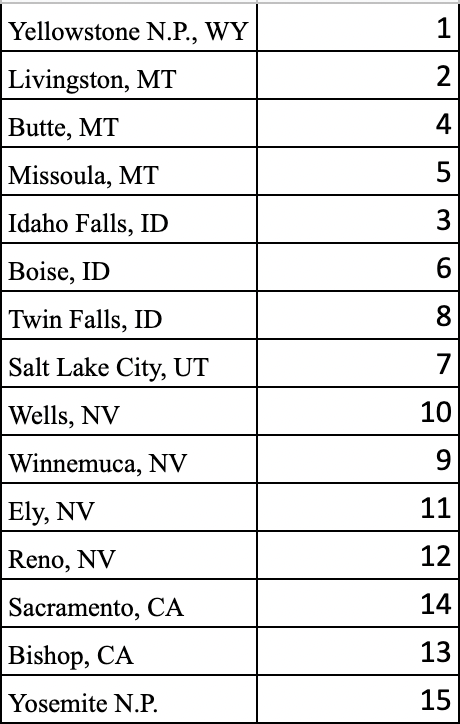

In [ ]:
#create graph adt
# Mileage Data
ADT=graph.graph()


ADT.append(1,2,59)
ADT.append(1,3,100)
ADT.append(2,4,104)
ADT.append(4,3,205)
ADT.append(4,5,119)
ADT.append(5,6,371)
ADT.append(3,7,208)
ADT.append(3,8,161)
ADT.append(6,8,131)
ADT.append(6,9,256)
ADT.append(8,10,118)
ADT.append(7,10,181)
ADT.append(7,11,241)
ADT.append(10,9,175)
ADT.append(10,11,140)
ADT.append(9,12,164)
ADT.append(11,13,283)
ADT.append(12,13,205)
ADT.append(12,14,133)
ADT.append(12,15,154)
ADT.append(14,15,193)
ADT.append(13,15,65)

In [ ]:
# Time Data
ADT=graph.graph()

ADT.append(1,2,84)
ADT.append(1,3,128)
ADT.append(2,4,100)
ADT.append(4,3,210)
ADT.append(4,5,110)
ADT.append(5,6,475)
ADT.append(3,7,206)
ADT.append(3,8,155)
ADT.append(6,8,128)
ADT.append(6,9,303)
ADT.append(8,10,141)
ADT.append(7,10,174)
ADT.append(7,11,262)
ADT.append(10,9,162)
ADT.append(10,11,180)
ADT.append(9,12,153)
ADT.append(11,13,337)
ADT.append(12,13,255)
ADT.append(12,14,152)
ADT.append(12,15,225)
ADT.append(14,15,277)
ADT.append(13,15,132)

In [ ]:
def dijkstra(ADT,start,end):
    """Dijkstra's Algorithm"""
    
    #all weights in dcg must be positive 
    #otherwise we have to use bellman ford instead
    neg_check=[j for i in ADT.reveal() for j in ADT.reveal()[i].values()]
    assert min(neg_check)>=0,"negative weights are not allowed, please use Bellman-Ford"
    queue={}
    queue[start]=0
    distance={}
    for i in ADT.vertex():
        distance[i]=float('inf')
    distance[start]=0
    pred={}

    while queue:
        
        #vertex with the minimum weight in queue
        current=min(queue,key=queue.get)
        queue.pop(current)
        
        for j in ADT.edge(current):
            
            #check if the current vertex can construct the optimal path
            if distance[current]+ADT.weight(current,j)<distance[j]:
                distance[j]=distance[current]+ADT.weight(current,j)
                pred[j]=current
            
            #add child vertex to the queue
            if ADT.go(j)==0 and j not in queue:
                queue[j]=distance[j]
        
        #each vertex is visited only once
        ADT.visit(current)
        
        #traversal ends when the target is met
        if current==end:
            break
    
    #create the shortest path by backtracking
    #trace the predecessor vertex from end to start
    previous=end
    path=[]
    while pred:
        path.insert(0, previous)
        if previous==start:
            break
        previous=pred[previous]
    return distance[end],path

In [ ]:
print('minimum steps for Mileage:%d, path:%s'%dijkstra(ADT,1,15))

minimum steps for Mileage:867, path:[1, 3, 8, 10, 11, 13, 15]


In [ ]:
print('minimum steps for Time:%d, path:%s'%dijkstra(ADT,1,15))

minimum steps for Time:964, path:[1, 3, 8, 10, 9, 12, 15]
